# Support Vector Machines

A *Support Vector Machine* (SVM) is a commonly used method for linear and non-linear classification, doing regression analysis or identifying outsiders. Because they are used so much, Scikit also has standard tooling for it in-house.

As always, we start importing the most important libraries. In this assignment we use the well-known (and often mentioned) <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set"> iris dataset </a>. This is included in `sklearn.datasets` by default, so we have to import them as well. We also use a number of help functions here, but because there are many this time, we moved them to a separate file (`Helpers.py`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from Helpers import plot_svc_decision_boundary 

## Load and split

As always, we start by making a visual representation of the dataset. This time, however, we also do something more, to clarify the idea of SVM a bit: In addition to plotting the data points themselves, we also draw three *classifiers* in the same plot. These *classifiers* have already been given, as well as the loading of the dataset.

The data that is loaded consists of a *dictionary* with keys `data` and` target`. This corresponds to the $ X $ matrix and the $ y $ vector, respectively. The matrix $ X $ contains four columns:

- index 0: length of the sepals in centimeters
- index 1: oak leaf in centimeters
- index 2: length of the petal in centimeters
- index 3: width of the petal in centimeters

In the rest of this Notebook, we want to look at the ratio of the width and length of the petal to determine the type of iris. Initially, we only look at the flowers that are a *Setosa* ($ y = 0 $) or a *Versicolor* ($ y = 1 $), and the flowers that are *not*.

Follow the instructions in the cell. Prepare the $X$ matrix and the $y$ vector.

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
print (iris['data'][1:3, :])
print (y.shape)

# create a mask for the type of flowers. See example code below

y_demo = np.array([1,2,3,0,0,1])
X_demo = np.array( ([1,2],[1,3],[0,1],[0,4], [4,2], [5,2]))

mask = (y_demo==0) | (y_demo==1)
print (X_demo[mask])
print (y_demo[mask])


setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
(150,)
[[1 2]
 [0 4]
 [4 2]
 [5 2]]
[1 0 0 1]


## Plot data and *classifiers*

We create randomly three classifiers

In [3]:
x0 = np.linspace(0, 5.5, 200)

pred_1 = 5*x0 - 20        #C1 -  ('g-')
pred_2 = x0 - 1.8         #C2 -  ('c-')
pred_3 = 0.1 * x0 + 0.5   #C3 -  ('r-')

Then create a scatter plot showing the different types of flowers and add the classifiers to it. Use the `plot` method from matplotlib to draw these lines.

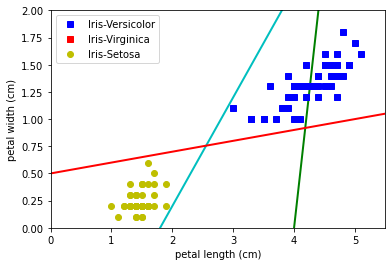

In [4]:
plt.plot(x0, pred_1, "g-", linewidth=2)
plt.plot(x0, pred_2, "c-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "rs", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("petal length (cm)", fontsize=10)
plt.ylabel("petal width (cm)", fontsize=10)
plt.legend(loc="upper left", fontsize=10)
plt.axis([0, 5.5, 0, 2])
plt.show()


As you can see, the green classifier (`C1`) is so bad that it is not even able to distinguish the Versicolor from the Setosa. The cyan (`C2`) and the red (` 3`) classifiers do, but offer very little space between the border cases: the distance between these border cases and the *boundary* is minimal. These two classifiers are unlikely to identify new data that is close to the decision boundary.

An SVM creates a decision-boundary between two (or more) classes, but in doing so tries to keep as much distance as possible between the border cases and the boundary - a technique known as the Large Margin Classification. You can imagine an SVM as a classifier that tries to create as wide a street as possible between the different classes. The middle of that street is then the decision-boundary and the two edges of that street are the distance between the extremes of the different classes on the one hand and the boundary on the other.

Use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html"> Support Vector Classifier SVC (SVC) by Scikit Learn </a> to create a decision boundary between two classes. The SVM class has many settings, but the most important for now are `kernel` and the parameter` C`. The `kernel` parameter indicates what kind of classification we want to achieve (linear, logistic, ...). The parameter 'C' has to do with the regularization and determines the width of the 'street'. The smaller the value of `C`, the wider the street but the more instances are incorrectly classified (because this parameter requires a consideration of the performance and the accuracy of our classifier this is a *hyperparameter*).

Create an SVC with a linear kernel (`kernel = 'linear' `) and a` C` of 10. Then call the `fit ()` method on that SVC and create a plot again.

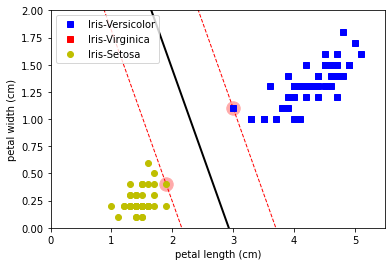

In [5]:
svm_clf = SVC(kernel="linear",  C=10)
svm_clf.fit(X, y)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "rs", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("petal length (cm)", fontsize=10)
plt.ylabel("petal width (cm)", fontsize=10)
plt.legend(loc="upper left", fontsize=10)
plt.axis([0, 5.5, 0, 2])
plt.show()

As you can see, there is a reasonable distance between the *boundary* and the two support vectors. Also note that adding more examples on either side of the boundary does not make the classification better or more accurate: the lines in the figure above are completely determined by the boundary cases on either side of the 'street' - these are the support vectors.

Also note that two observations are provided with a kind of 'glow'. This is to indicate that these two act as *Support Vectors*. You also see that these are the two extremes within the data set.